In [1]:
import networkx as nx
import networkx.algorithms.approximation as nxaa
import itertools
import matplotlib.pyplot as plt
from tabulate import tabulate
from time import time

# Independent Set Variant

A variant of the independent set problem is:

**Given a graph G with n vertices, decide if every subgraph of size m contains an independent set of size at least k**

In this notebook, we will provide a simple algorithm for solving this problem and run some tests on our algorithm. We will also test the runtimes of different values of m and k for a various graphs. 

### Our algorithm:

1. Find all subgraphs of size m in a graph G
2. For every subgraph, use networkx's ```maximum_independent_set``` function to find an approximate maximum independent set of that subgraph. If the size of the independent set to see if it is less than k nodes, return FALSE. Otherwise if all maximum independent sets have at least k nodes, return TRUE.

### Runtime Analysis:

- in step 1, note that the number of subgraphs of size m is ${n}\choose{m}$, and this value is largest when $m \approx \frac{n}{2}$. Given that $m \approx \frac{n}{2}$, then ${n}\choose{m}$ = $\frac{n!}{\frac{n}{2}!\frac{n}{2}!} <= 2^n$
- in step 2, the expected runtime ```maximum_independent_set``` is $O(\frac{n}{log^2 n})$
- The total the runtime of this method is $O(2^n * \frac{n}{log^2 n})$

### Code

In [2]:
# Code for our solution

def test(G, m_list, k_list):
    """
    Tests the runtime of our algorithm on a graph with varying m and k parameters
    
    params:
    - G: input graph
    - m_list: list of subgraph sizes to test
    - k_list: list of independent set sizes to test
    """
    
    results = []
    
    test_count = 0
    
    for m in m_list:
        for k in k_list:
            
            # skip if independent set size is graph than subgraph size
            if k > m:
                continue
            
            test_count += 1
            #print('Running test {}, m={}, k={}'.format(test_count, m, k))
            
            # begin timer
            start_time = time()
            
            # create all subgraphs of size m
            subgraphs = make_subgraphs(G, m)
            
            # check if all subgraphs have an independent set of size at least k
            decision = solve_subgraphs(subgraphs, k)
            
            # end timer
            end_time = time()
            
            results.append([m, len(subgraphs), k, decision, round(end_time-start_time, 2)])
            
    # print the results
    print()
    print(tabulate(results, headers=['m (subgraph size)', '# of subgraphs', 'k (indep set size)', 'decision', 'elapsed time (sec)']))
    
def solve_subgraphs(subgraphs, k):
    """
    Returns True if all subgraphs have independent size at least k and False otherwise
    
    params:
    - subgraphs: list of subgraphs
    - k: (int) independent set size
    
    returns:
    - (bool) True or False
    """
    
    for S in subgraphs:
        iset = nxaa.maximum_independent_set(S) # find the maximum independent set
        if len(iset) < k:
            return False
    return True

def make_subgraphs(G, m):
    """
    Given a graph and an integer m, find all subgraphs of size m
    
    params:
    - G: input graph
    - m: (int) subgraph size
    
    returns:
    - list of all subgraphs of size m
    """
    
    # get all nodes in each subgraph
    subgraph_nodes = list(itertools.combinations(list(G.nodes), m))
    
    # create the subgraphs
    subgraphs = []
    for nodes in subgraph_nodes:
        S =  G.subgraph(nodes)
        subgraphs.append(S)
        
    return subgraphs

### Tests


### Test 1

In the first test, we randomly generate a graph with 18 nodes and 30 edges. We will measure the runtime on parameters of m from 1 to 18 and k from 1 to 18.

As seem in the results table, the runtime is largest when m is around n/2, as expected

C:\Users\cathy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


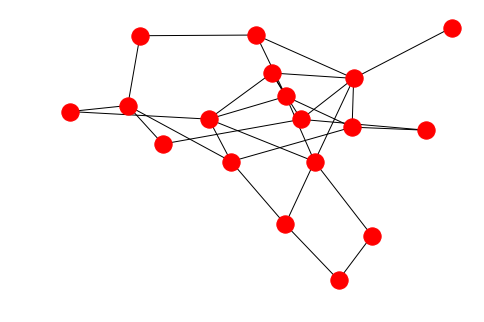


  m (subgraph size)    # of subgraphs    k (indep set size)  decision      elapsed time (sec)
-------------------  ----------------  --------------------  ----------  --------------------
                  1                18                     1  True                        0
                  4              3060                     1  True                        2.16
                  4              3060                     4  False                       0.07
                  9             48620                     1  True                      132.16
                  9             48620                     4  False                      77.51
                  9             48620                     8  False                       1.02
                 14              3060                     1  True                       20.6
                 14              3060                     4  True                       23.29
                 14              3060                     8  Fa

In [5]:
# Generate a random graph
n_nodes = 18  # number of nodes
n_edges = 30  # number of edges
G = nx.dense_gnm_random_graph(n_nodes, n_edges)

# Plot the graph
nx.draw(G)
plt.show()

# Test runtimes of different m and k values
m_list = [1, 4, 9, 14, 18]
k_list = [1, 4, 8, 14, 18]
test(G, m_list, k_list)

### Test 2

In the second test, we will remove some edges in the graph. Again, the runtime is largest when m = n/2, we also note that overall runtimes are larger than the first time. This can be explained by the fact that since there are less edges, there are possibly more independent sets.

C:\Users\cathy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


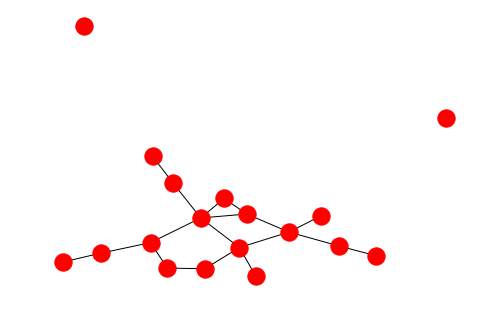


  m (subgraph size)    # of subgraphs    k (indep set size)  decision      elapsed time (sec)
-------------------  ----------------  --------------------  ----------  --------------------
                  1                18                     1  True                        0
                  4              3060                     1  True                        2.13
                  4              3060                     4  False                       0.03
                  9             48620                     1  True                      143.94
                  9             48620                     4  True                      140.38
                  9             48620                     8  False                       0.96
                 14              3060                     1  True                       22.09
                 14              3060                     4  True                       24.05
                 14              3060                     8  F

In [6]:
# TEST 2 
# make the graph less dense

# Generate a random graph
n_nodes = 18  # number of nodes
n_edges = 18  # number of edges
G = nx.dense_gnm_random_graph(n_nodes, n_edges)

# Plot the graph
nx.draw(G)
plt.show()

# Test runtimes of different m and k values
m_list = [1, 4, 9, 14, 18]
k_list = [1, 4, 8, 14, 18]
test(G, m_list, k_list)

### Test 3

In this test we increase the number of edges in the graph. Again, the runtime is slowest when m around n/2, but the overall runtimes are faster possibly since more edges means that there are less independent sets in the graph.

C:\Users\cathy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


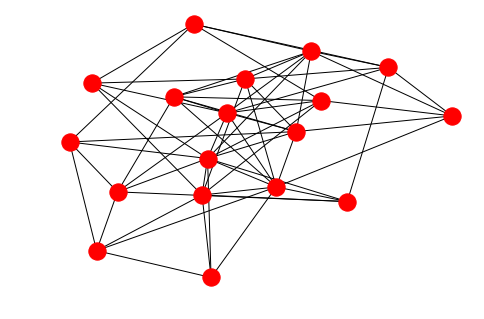


  m (subgraph size)    # of subgraphs    k (indep set size)  decision      elapsed time (sec)
-------------------  ----------------  --------------------  ----------  --------------------
                  1                18                     1  True                        0
                  4              3060                     1  True                        2.16
                  4              3060                     4  False                       0.02
                  9             48620                     1  True                      112.61
                  9             48620                     4  False                       0.81
                  9             48620                     8  False                       0.93
                 14              3060                     1  True                       14.47
                 14              3060                     4  True                       14.51
                 14              3060                     8  F

In [7]:
# TEST 3
# make graph more dense

# Generate a random graph
n_nodes = 18  # number of nodes
n_edges = 60  # number of edges
G = nx.dense_gnm_random_graph(n_nodes, n_edges)

# Plot the graph
nx.draw(G)
plt.show()

# Test runtimes of different m and k values
m_list = [1, 4, 9, 14, 18]
k_list = [1, 4, 8, 14, 18]
test(G, m_list, k_list)

### Test 4

In this final test, we decrease the number of nodes by 4. The most interesting observation of this test is that the runtimes are overall much faster. This is to be expected, as our runtime is upper bounded by an exponential number of subgraphs to examine, so a slight change in the number of nodes in the input graph can significantly increase or decrease the runtime 

C:\Users\cathy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


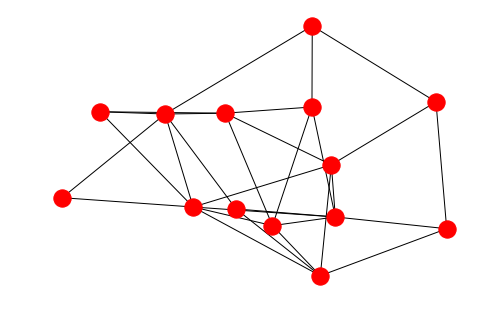


  m (subgraph size)    # of subgraphs    k (indep set size)  decision      elapsed time (sec)
-------------------  ----------------  --------------------  ----------  --------------------
                  1                14                     1  True                        0.01
                  4              1001                     1  True                        0.63
                  4              1001                     4  False                       0.01
                  9              2002                     1  True                        5.05
                  9              2002                     4  False                       0.67
                  9              2002                     8  False                       0.07
                 14                 1                     1  True                        0.01
                 14                 1                     4  True                        0.01
                 14                 1                     8

In [8]:
# TEST 4
# Decrease number of nodes

# Generate a random graph
n_nodes = 14  # number of nodes
n_edges = 30  # number of edges
G = nx.dense_gnm_random_graph(n_nodes, n_edges)

# Plot the graph
nx.draw(G)
plt.show()

# Test runtimes of different m and k values
m_list = [1, 4, 9, 14]
k_list = [1, 4, 8, 14]
test(G, m_list, k_list)